In [1]:
# Sample API
import flowx
import simulation
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 80
xmin, xmax = -2.5, 2.5
ymin, ymax = -9.0, 1.0

# Define cell-centered variable names
center_vars   = ['pres', 'divv', 'ibmf', 'delp']
face_vars     = ['velc', 'hvar']
ins_vars      = ['velc', 'hvar', 'divv', 'pres', 'delp']
poisson_vars  = ['delp', 'divv']
imbound_vars  = ['ibmf', 'velc']

scalar_info   = dict(tmax = 8, dt = 0.01, Re = 100.0)

simulation_info = dict(time_stepping = 'ab2', 
                       poisson_solver = 'serial_lu', 
                       maxiter = 2000,
                       tol = 1e-10,
                       with_ib = True,
                       mapping_type = 'ann',
                       ntrees = 20,
                       nquery_trees = 1,
                       nquery_trace = 2)

particle_info = [dict(input='HDF5', file='sm_body.00001.h5', vel = [0.0,-1.0])]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(delp = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(delp = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc =[0.0, 0.0, 0.0, 0.0])

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info, particle_info, 
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, poisson_info=simulation_info)

imbound = flowx.imbound_main(domain_data_struct, imbound_vars, imbound_info=simulation_info)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, ins_info=simulation_info)

Level Set Mapping Time:  0.31081509590148926
------------ Time = 0.01 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.791654612266284e-12
Total poisson time : 0.0008499622344970703
Total INS time : 0.002009868621826172
Max, Min, U   : 0.5042397541052344, -0.5042397541052347
Max, Min, V   : 0.40169913581524636, -0.5864431329190852
Max, Min, P   : 18.280248943845326, -32.44357977387638
Max, Min, DIV : 1.609823385706477e-14, -1.3766765505351941e-14
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.29082584381103516
------------ Time = 0.02 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0923704081032014e-12
Total poisson time : 0.0006861686706542969
Total INS time : 0.001651763916015625
Max, Min, U   : 1.0734987289520648, -1.073498728952065
Max, Min, V   : 0.8368434414317819, -1.0083865212352843
Max, Min, P   : 21.86283805055875, -38.36806860532945
Max, Min, DIV : 3.552713678800501e-15, -2.220446049250313e-15
Qin, Qou

Level Set Mapping Time:  0.275892972946167
------------ Time = 0.17 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.255575874603545e-13
Total poisson time : 0.0007240772247314453
Total INS time : 0.0016820430755615234
Max, Min, U   : 1.044806544731709, -1.0448065447317088
Max, Min, V   : 0.93355438964015, -1.0329210078665232
Max, Min, P   : 10.090653751218902, -4.525403344787842
Max, Min, DIV : 1.4389531233227615e-15, -1.3322676295501878e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2738010883331299
------------ Time = 0.18000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.886859640376915e-14
Total poisson time : 0.0007500648498535156
Total INS time : 0.0017070770263671875
Max, Min, U   : 1.0234035755628936, -1.0234035755628936
Max, Min, V   : 0.9105482094281174, -1.0365262053889213
Max, Min, P   : 10.096432833946928, -4.780598037857664
Max, Min, DIV : 1.3322676295501878e-15, -1.748601263784621

Level Set Mapping Time:  0.30838894844055176
------------ Time = 0.3300000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7696477414816297e-13
Total poisson time : 0.0009760856628417969
Total INS time : 0.0025911331176757812
Max, Min, U   : 0.8601625253036512, -0.860162525303651
Max, Min, V   : 0.709220603591671, -1.1300140861295354
Max, Min, P   : 10.633727670506216, -2.7680833030608056
Max, Min, DIV : 9.71445146547012e-16, -1.5543122344752192e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.31484389305114746
------------ Time = 0.34000000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6526227063469378e-13
Total poisson time : 0.0007710456848144531
Total INS time : 0.001859903335571289
Max, Min, U   : 0.8561791699473186, -0.8561791699473184
Max, Min, V   : 0.6961325622667638, -1.1242126450003438
Max, Min, P   : 10.758653637312882, -1.6297607707540513
Max, Min, DIV : 1.3322676295501878e-15,

Level Set Mapping Time:  0.2852342128753662
------------ Time = 0.49000000000000027 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.622053526403512e-14
Total poisson time : 0.0007359981536865234
Total INS time : 0.0016779899597167969
Max, Min, U   : 0.7933186090194704, -0.79331860901947
Max, Min, V   : 0.5670846379704919, -1.071196672027213
Max, Min, P   : 11.378904576445361, -1.1727614067003238
Max, Min, DIV : 1.1102230246251565e-15, -9.922618282587337e-16
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.27797794342041016
------------ Time = 0.5000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.354509206703463e-14
Total poisson time : 0.0007097721099853516
Total INS time : 0.001714944839477539
Max, Min, U   : 0.788322427099382, -0.7883224270993817
Max, Min, V   : 0.5681413002008984, -1.0687334893293619
Max, Min, P   : 11.26626217723359, -1.1573971597739046
Max, Min, DIV : 1.4988010832439613e-15, -1.3

Level Set Mapping Time:  0.30222320556640625
------------ Time = 0.6500000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5537902013500188e-13
Total poisson time : 0.0007429122924804688
Total INS time : 0.0016970634460449219
Max, Min, U   : 0.7746042248726162, -0.7746042248726162
Max, Min, V   : 0.5278552151833065, -1.124824785671392
Max, Min, P   : 10.189154031240388, -1.6666471572130237
Max, Min, DIV : 1.3600232051658168e-15, -1.2212453270876722e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.3213839530944824
------------ Time = 0.6600000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.060786052200452e-13
Total poisson time : 0.0008912086486816406
Total INS time : 0.0023279190063476562
Max, Min, U   : 0.7182011495550913, -0.7182011495550913
Max, Min, V   : 0.5274899388295734, -1.1250166890626898
Max, Min, P   : 9.804744041472688, -2.9194123362583264
Max, Min, DIV : 1.609823385706477e-15, 

Level Set Mapping Time:  0.2919919490814209
------------ Time = 0.8100000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1361070943793136e-13
Total poisson time : 0.0007250308990478516
Total INS time : 0.0016560554504394531
Max, Min, U   : 0.7665343948948491, -0.7665343948948492
Max, Min, V   : 0.5132557129577606, -1.1868328568391808
Max, Min, P   : 6.766171949612864, -3.60674294750942
Max, Min, DIV : 1.6237011735142914e-15, -1.2212453270876722e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.28441905975341797
------------ Time = 0.8200000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.664993790357513e-13
Total poisson time : 0.0007169246673583984
Total INS time : 0.0016829967498779297
Max, Min, U   : 0.8025980888038007, -0.8025980888038008
Max, Min, V   : 0.5078327484827304, -1.1942497207004656
Max, Min, P   : 7.137536026360887, -3.2289201359677726
Max, Min, DIV : 1.5543122344752192e-15, -

Level Set Mapping Time:  0.30448389053344727
------------ Time = 0.9700000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.679927110158811e-14
Total poisson time : 0.0010178089141845703
Total INS time : 0.002221822738647461
Max, Min, U   : 0.7121782243096688, -0.7121782243096688
Max, Min, V   : 0.5055826718575226, -1.2260138491189998
Max, Min, P   : 3.340272902616269, -1.8333257038040105
Max, Min, DIV : 1.4016565685892601e-15, -1.3322676295501878e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.29419636726379395
------------ Time = 0.9800000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.977334976542656e-14
Total poisson time : 0.0008461475372314453
Total INS time : 0.001798868179321289
Max, Min, U   : 0.6930494449505025, -0.6930494449505025
Max, Min, V   : 0.4969454763733898, -1.2330952494313334
Max, Min, P   : 3.3841226584276836, -1.8918276081447516
Max, Min, DIV : 1.1102230246251565e-15, 

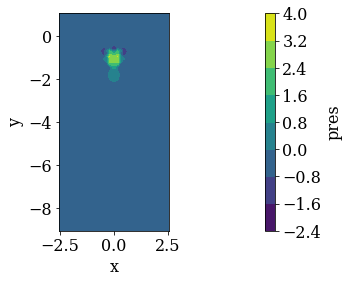

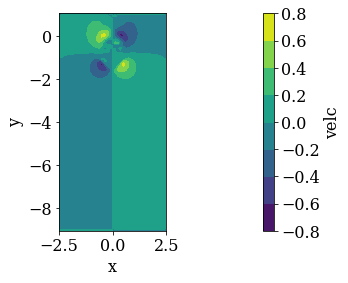

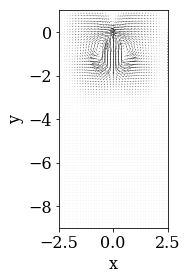

Level Set Mapping Time:  0.28220176696777344
------------ Time = 1.0100000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.343911925888093e-13
Total poisson time : 0.0007050037384033203
Total INS time : 0.0017170906066894531
Max, Min, U   : 0.6872271499317532, -0.6872271499317528
Max, Min, V   : 0.500035669657537, -1.2489593968603965
Max, Min, P   : 3.05578687183138, -2.3317472728543227
Max, Min, DIV : 1.5543122344752192e-15, -1.5543122344752192e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.3160820007324219
------------ Time = 1.0200000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0522748852153066e-13
Total poisson time : 0.0007359981536865234
Total INS time : 0.0016791820526123047
Max, Min, U   : 0.7561901902948311, -0.7561901902948309
Max, Min, V   : 0.5000942305672703, -1.2562435395745624
Max, Min, P   : 3.106579928853143, -1.9618928923900665
Max, Min, DIV : 1.6410484082740595e-15, -

Level Set Mapping Time:  0.32706594467163086
------------ Time = 1.1700000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0226574844452823e-13
Total poisson time : 0.0009989738464355469
Total INS time : 0.002402782440185547
Max, Min, U   : 0.6848904579297868, -0.6848904579297869
Max, Min, V   : 0.48887463973210915, -1.335094777156664
Max, Min, P   : 3.232680610587425, -3.43358740018604
Max, Min, DIV : 1.3322676295501878e-15, -1.7763568394002505e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2966649532318115
------------ Time = 1.1800000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1451931730227372e-13
Total poisson time : 0.0006940364837646484
Total INS time : 0.001634836196899414
Max, Min, U   : 0.7614839071164786, -0.7614839071164787
Max, Min, V   : 0.4850529189068059, -1.3391268738719693
Max, Min, P   : 3.277789522173577, -3.6833939940648492
Max, Min, DIV : 1.4016565685892601e-15, -1

Level Set Mapping Time:  0.28205275535583496
------------ Time = 1.330000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.574217647637341e-13
Total poisson time : 0.0007359981536865234
Total INS time : 0.0017168521881103516
Max, Min, U   : 0.7713946529105068, -0.771394652910507
Max, Min, V   : 0.478322964142095, -1.3215967682846954
Max, Min, P   : 3.4699459109338915, -2.138536864770508
Max, Min, DIV : 1.4641066137244252e-15, -1.1102230246251565e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2987551689147949
------------ Time = 1.340000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5299709594460926e-13
Total poisson time : 0.0007231235504150391
Total INS time : 0.0016770362854003906
Max, Min, U   : 0.7355553901870643, -0.7355553901870644
Max, Min, V   : 0.4799822417191511, -1.3266614941857997
Max, Min, P   : 3.5917694445363653, -1.2148476302274918
Max, Min, DIV : 1.6653345369377348e-15, -1

Level Set Mapping Time:  0.4232819080352783
------------ Time = 1.490000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.541269219884451e-14
Total poisson time : 0.0010030269622802734
Total INS time : 0.0028579235076904297
Max, Min, U   : 0.6698519769704977, -0.6698519769704979
Max, Min, V   : 0.46499954427622525, -1.3549828642129997
Max, Min, P   : 3.8504070888552, -0.9891050815257848
Max, Min, DIV : 1.3322676295501878e-15, -1.3322676295501878e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.43834805488586426
------------ Time = 1.500000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.379460385188108e-14
Total poisson time : 0.0010099411010742188
Total INS time : 0.0025069713592529297
Max, Min, U   : 0.6533506689516327, -0.6533506689516331
Max, Min, V   : 0.46645669307119886, -1.3560650515917188
Max, Min, P   : 3.7024382422956226, -0.9028904447961599
Max, Min, DIV : 1.5543122344752192e-15, -

Level Set Mapping Time:  0.42265820503234863
------------ Time = 1.6500000000000012 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.861536415201114e-14
Total poisson time : 0.0009889602661132812
Total INS time : 0.002519845962524414
Max, Min, U   : 0.747723442887431, -0.747723442887431
Max, Min, V   : 0.4593308538153806, -1.3794935751685373
Max, Min, P   : 3.458530697805354, -1.3485642422077342
Max, Min, DIV : 1.5543122344752192e-15, -1.3322676295501878e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.4351933002471924
------------ Time = 1.6600000000000013 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2648200340842498e-13
Total poisson time : 0.001171112060546875
Total INS time : 0.0028870105743408203
Max, Min, U   : 0.6935499731599601, -0.6935499731599601
Max, Min, V   : 0.460056215307909, -1.3818109530617018
Max, Min, P   : 3.294981979593401, -2.4109766331556397
Max, Min, DIV : 1.7763568394002505e-15, -1.5

Level Set Mapping Time:  0.45455002784729004
------------ Time = 1.8100000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0747526862051774e-13
Total poisson time : 0.0011298656463623047
Total INS time : 0.0025360584259033203
Max, Min, U   : 0.7341403800112667, -0.7341403800112665
Max, Min, V   : 0.45057715349449606, -1.3990729686935535
Max, Min, P   : 3.000139288482645, -3.167450634395523
Max, Min, DIV : 1.7763568394002505e-15, -1.429412144204889e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.361677885055542
------------ Time = 1.8200000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4576806650436619e-13
Total poisson time : 0.0013608932495117188
Total INS time : 0.0023691654205322266
Max, Min, U   : 0.7650801666400922, -0.7650801666400919
Max, Min, V   : 0.44832715691045527, -1.3993337462952573
Max, Min, P   : 3.1198488200054086, -2.79477291458554
Max, Min, DIV : 1.4710455076283324e-15, 

Level Set Mapping Time:  0.38654112815856934
------------ Time = 1.9700000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.16585929189741e-14
Total poisson time : 0.0008587837219238281
Total INS time : 0.0019259452819824219
Max, Min, U   : 0.6946982259481017, -0.6946982259481019
Max, Min, V   : 0.4452741590787269, -1.4107513188652665
Max, Min, P   : 3.9150509595859977, -0.904097045819184
Max, Min, DIV : 1.4432899320127035e-15, -1.4432899320127035e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.41501379013061523
------------ Time = 1.9800000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0306812462259513e-13
Total poisson time : 0.0013589859008789062
Total INS time : 0.003281116485595703
Max, Min, U   : 0.682139915907028, -0.6821399159070282
Max, Min, V   : 0.44077251577630244, -1.4103634529577493
Max, Min, P   : 3.9639670093834494, -0.9182056691341315
Max, Min, DIV : 1.4432899320127035e-15,

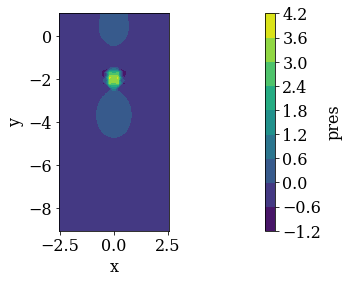

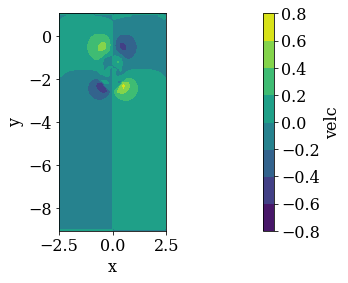

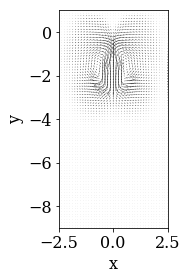

Level Set Mapping Time:  0.4243159294128418
------------ Time = 2.010000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.029143440325655e-13
Total poisson time : 0.0011088848114013672
Total INS time : 0.0023522377014160156
Max, Min, U   : 0.6726548687321668, -0.672654868732167
Max, Min, V   : 0.44303843876239496, -1.402842388789331
Max, Min, P   : 3.3950778849536714, -1.8266323128765602
Max, Min, DIV : 1.3322676295501878e-15, -1.27675647831893e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.36222290992736816
------------ Time = 2.020000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0987065496528456e-13
Total poisson time : 0.000978231430053711
Total INS time : 0.00220489501953125
Max, Min, U   : 0.7378507483331324, -0.7378507483331325
Max, Min, V   : 0.4423919996737356, -1.3999737840652808
Max, Min, P   : 3.1995586079645886, -1.5118061587639364
Max, Min, DIV : 1.5543122344752192e-15, -1.38

Level Set Mapping Time:  0.38582682609558105
------------ Time = 2.1699999999999977 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.890736276889546e-14
Total poisson time : 0.0007698535919189453
Total INS time : 0.0017650127410888672
Max, Min, U   : 0.6682356722093555, -0.6682356722093555
Max, Min, V   : 0.4404544875001908, -1.4083350999287743
Max, Min, P   : 3.258147070000824, -3.0682030169838925
Max, Min, DIV : 1.7763568394002505e-15, -1.6822480908285087e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.3749709129333496
------------ Time = 2.1799999999999975 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.094789349349675e-13
Total poisson time : 0.0009980201721191406
Total INS time : 0.002549886703491211
Max, Min, U   : 0.7392789726475079, -0.7392789726475079
Max, Min, V   : 0.43922918881977385, -1.4120425140211115
Max, Min, P   : 3.2693602912298876, -3.3203654565009244
Max, Min, DIV : 1.7034984534092246e-15,

Level Set Mapping Time:  0.3043968677520752
------------ Time = 2.3299999999999943 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3811646832708006e-13
Total poisson time : 0.00075531005859375
Total INS time : 0.0016989707946777344
Max, Min, U   : 0.7469141971732774, -0.7469141971732774
Max, Min, V   : 0.4359218291076798, -1.4161188140870886
Max, Min, P   : 3.325141423624299, -1.9570747795215093
Max, Min, DIV : 1.3322676295501878e-15, -1.5543122344752192e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.31507205963134766
------------ Time = 2.339999999999994 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0507043591656787e-13
Total poisson time : 0.0008399486541748047
Total INS time : 0.0024261474609375
Max, Min, U   : 0.7110776825853503, -0.7110776825853503
Max, Min, V   : 0.43672732085180604, -1.4184932158884505
Max, Min, P   : 3.451847143014179, -1.0635798595554768
Max, Min, DIV : 1.3322676295501878e-15, -1.

Level Set Mapping Time:  0.31605982780456543
------------ Time = 2.489999999999991 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0333817463508136e-13
Total poisson time : 0.0006947517395019531
Total INS time : 0.0016360282897949219
Max, Min, U   : 0.662705005842249, -0.6627050058422492
Max, Min, V   : 0.42610211027645345, -1.4192296014313617
Max, Min, P   : 3.755675485647564, -0.9608265941710793
Max, Min, DIV : 1.3322676295501878e-15, -1.5543122344752192e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.280609130859375
------------ Time = 2.4999999999999907 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.960793612362583e-14
Total poisson time : 0.0007531642913818359
Total INS time : 0.0017271041870117188
Max, Min, U   : 0.6463953056212514, -0.6463953056212516
Max, Min, V   : 0.42668516179047883, -1.4195586977617738
Max, Min, P   : 3.616159686787512, -0.8767560338004079
Max, Min, DIV : 1.5543122344752192e-15, 

Level Set Mapping Time:  0.29454731941223145
------------ Time = 2.6499999999999875 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.098430844989769e-14
Total poisson time : 0.0007498264312744141
Total INS time : 0.0017120838165283203
Max, Min, U   : 0.7371375346610666, -0.7371375346610664
Max, Min, V   : 0.4235105802071437, -1.4186039290062689
Max, Min, P   : 3.441524080219966, -1.284203519240104
Max, Min, DIV : 1.609823385706477e-15, -1.2212453270876722e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.31477785110473633
------------ Time = 2.6599999999999873 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.572599176068067e-13
Total poisson time : 0.0007469654083251953
Total INS time : 0.0017130374908447266
Max, Min, U   : 0.6835946157588744, -0.6835946157588743
Max, Min, V   : 0.42517348574264807, -1.4200507528911819
Max, Min, P   : 3.27701087670947, -2.313745245034417
Max, Min, DIV : 1.7763568394002505e-15, -1

Level Set Mapping Time:  0.28603506088256836
------------ Time = 2.809999999999984 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0714978048746847e-13
Total poisson time : 0.0007050037384033203
Total INS time : 0.0016739368438720703
Max, Min, U   : 0.7205196741843707, -0.7205196741843708
Max, Min, V   : 0.4208227331355237, -1.4177040057960035
Max, Min, P   : 2.97843215587615, -3.0386485165130916
Max, Min, DIV : 1.1379786002407855e-15, -1.7763568394002505e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.27395081520080566
------------ Time = 2.819999999999984 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5617179258022962e-13
Total poisson time : 0.0006940364837646484
Total INS time : 0.0016560554504394531
Max, Min, U   : 0.7493711299012394, -0.7493711299012394
Max, Min, V   : 0.41970940227924886, -1.4177117339188288
Max, Min, P   : 3.070071540660594, -2.700617002677534
Max, Min, DIV : 1.3322676295501878e-15, 

Level Set Mapping Time:  0.3089878559112549
------------ Time = 2.9699999999999807 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.943309165877719e-14
Total poisson time : 0.0007560253143310547
Total INS time : 0.002162933349609375
Max, Min, U   : 0.6892601629988042, -0.6892601629988044
Max, Min, V   : 0.41806307559174755, -1.4136423425225306
Max, Min, P   : 3.819030463137143, -0.9134895526700194
Max, Min, DIV : 1.3877787807814457e-15, -1.6653345369377348e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.29518699645996094
------------ Time = 2.9799999999999804 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.690666579631996e-14
Total poisson time : 0.0006880760192871094
Total INS time : 0.0016238689422607422
Max, Min, U   : 0.6768368068095844, -0.6768368068095846
Max, Min, V   : 0.4191903386007829, -1.4133840911623774
Max, Min, P   : 3.868155712428058, -0.9257092891130858
Max, Min, DIV : 1.7763568394002505e-15, 

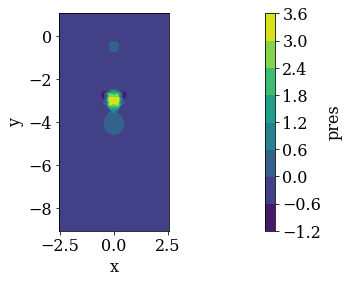

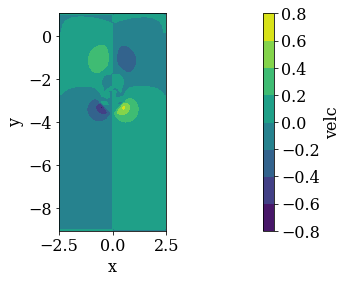

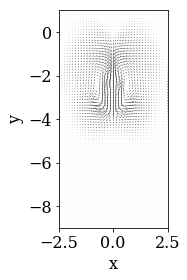

Level Set Mapping Time:  0.2973911762237549
------------ Time = 3.00999999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.268317694818707e-13
Total poisson time : 0.0007460117340087891
Total INS time : 0.0017399787902832031
Max, Min, U   : 0.6662782806048138, -0.6662782806048136
Max, Min, V   : 0.4185132155467726, -1.4089483232649576
Max, Min, P   : 3.3199054039520624, -1.8198854984045443
Max, Min, DIV : 1.7763568394002505e-15, -1.4432899320127035e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.3178839683532715
------------ Time = 3.0199999999999796 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1370090454436262e-13
Total poisson time : 0.0006940364837646484
Total INS time : 0.0016469955444335938
Max, Min, U   : 0.7299945598751331, -0.7299945598751331
Max, Min, V   : 0.41794223804222136, -1.4075387849475243
Max, Min, P   : 3.1512998166859583, -1.4818621802972554
Max, Min, DIV : 1.4432899320127035e-15,

Level Set Mapping Time:  0.2929117679595947
------------ Time = 3.1699999999999764 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0931713476284408e-13
Total poisson time : 0.0006878376007080078
Total INS time : 0.0016338825225830078
Max, Min, U   : 0.6642529478546145, -0.6642529478546145
Max, Min, V   : 0.41815696724008394, -1.404340070493841
Max, Min, P   : 3.2033633488880646, -3.0097471508293614
Max, Min, DIV : 1.5334955527634975e-15, -1.4432899320127035e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.28707408905029297
------------ Time = 3.179999999999976 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1229807936218786e-13
Total poisson time : 0.000759124755859375
Total INS time : 0.001699686050415039
Max, Min, U   : 0.7287691799429087, -0.7287691799429085
Max, Min, V   : 0.41699124504670104, -1.4029890892378731
Max, Min, P   : 3.2101581892522977, -3.2539430361903214
Max, Min, DIV : 1.5543122344752192e-15

Level Set Mapping Time:  0.2907099723815918
------------ Time = 3.329999999999973 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4665085112007914e-13
Total poisson time : 0.0007376670837402344
Total INS time : 0.0017199516296386719
Max, Min, U   : 0.7350914580207316, -0.7350914580207317
Max, Min, V   : 0.4150008154581966, -1.397794937207697
Max, Min, P   : 3.2616774070606835, -1.9182742060914943
Max, Min, DIV : 1.1102230246251565e-15, -1.3322676295501878e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.28218698501586914
------------ Time = 3.3399999999999728 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0887604859141676e-13
Total poisson time : 0.0006928443908691406
Total INS time : 0.0016398429870605469
Max, Min, U   : 0.6992683829760107, -0.6992683829760108
Max, Min, V   : 0.4153783014295034, -1.3980004897239275
Max, Min, P   : 3.3792664164620168, -1.0506143835931954
Max, Min, DIV : 1.7763568394002505e-15

Level Set Mapping Time:  0.32527995109558105
------------ Time = 3.4899999999999696 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.153473413210257e-13
Total poisson time : 0.0007498264312744141
Total INS time : 0.0017201900482177734
Max, Min, U   : 0.6589113796796948, -0.6589113796796946
Max, Min, V   : 0.41327649362689395, -1.3929902254229776
Max, Min, P   : 3.759131108981125, -0.8991840709442467
Max, Min, DIV : 1.3322676295501878e-15, -1.547373340571312e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2967989444732666
------------ Time = 3.4999999999999694 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.729330236610536e-14
Total poisson time : 0.0008471012115478516
Total INS time : 0.002471923828125
Max, Min, U   : 0.6426806662056088, -0.6426806662056086
Max, Min, V   : 0.41312932256933893, -1.3928535303330731
Max, Min, P   : 3.6203832396006277, -0.8184844390367474
Max, Min, DIV : 1.4988010832439613e-15, -1

Level Set Mapping Time:  0.2762119770050049
------------ Time = 3.649999999999966 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3245719103827475e-13
Total poisson time : 0.0007889270782470703
Total INS time : 0.0017437934875488281
Max, Min, U   : 0.731629131523781, -0.7316291315237811
Max, Min, V   : 0.4115516589306124, -1.388038961400207
Max, Min, P   : 3.5280761891051573, -1.1499849071345525
Max, Min, DIV : 1.1379786002407855e-15, -1.3322676295501878e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2895321846008301
------------ Time = 3.659999999999966 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7087208827780666e-13
Total poisson time : 0.000701904296875
Total INS time : 0.0016410350799560547
Max, Min, U   : 0.6784155394548129, -0.678415539454813
Max, Min, V   : 0.41275035811909744, -1.3890302022000998
Max, Min, P   : 3.3600107579124465, -2.1657710887108292
Max, Min, DIV : 1.7763568394002505e-15, -1.77

Level Set Mapping Time:  0.2748091220855713
------------ Time = 3.8099999999999627 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.267551436311719e-13
Total poisson time : 0.0006940364837646484
Total INS time : 0.0016360282897949219
Max, Min, U   : 0.7133765184405869, -0.713376518440587
Max, Min, V   : 0.4089274514602399, -1.3841959486003963
Max, Min, P   : 3.089802513308118, -2.848607350166826
Max, Min, DIV : 1.6375789613221059e-15, -1.3322676295501878e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2815117835998535
------------ Time = 3.8199999999999625 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.88848533355215e-13
Total poisson time : 0.0006971359252929688
Total INS time : 0.0016629695892333984
Max, Min, U   : 0.7411606382002185, -0.7411606382002186
Max, Min, V   : 0.4084283747056971, -1.3842756574939774
Max, Min, P   : 3.2059357005099223, -2.484350896950297
Max, Min, DIV : 1.5543122344752192e-15, -1.5

Level Set Mapping Time:  0.2819819450378418
------------ Time = 3.9699999999999593 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.504805928479501e-14
Total poisson time : 0.0013129711151123047
Total INS time : 0.003015756607055664
Max, Min, U   : 0.6862646559665564, -0.6862646559665564
Max, Min, V   : 0.4073159832563022, -1.3786961891415954
Max, Min, P   : 3.9512761597396637, -0.737385871107677
Max, Min, DIV : 1.1657341758564144e-15, -1.4432899320127035e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.27979111671447754
------------ Time = 3.979999999999959 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.677555412263637e-14
Total poisson time : 0.0007102489471435547
Total INS time : 0.0017879009246826172
Max, Min, U   : 0.6739039309959794, -0.6739039309959794
Max, Min, V   : 0.4084138914461256, -1.3787348768731345
Max, Min, P   : 4.015088492244451, -0.7339642008199057
Max, Min, DIV : 1.3322676295501878e-15, -1

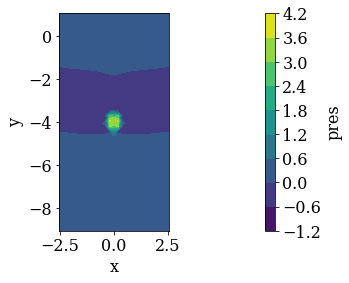

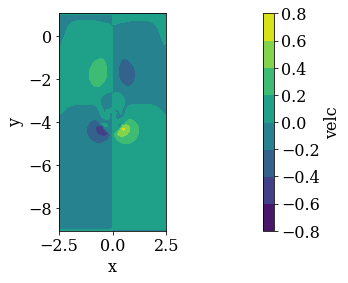

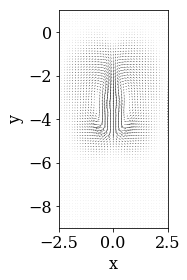

Level Set Mapping Time:  0.2759387493133545
------------ Time = 4.009999999999959 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3068057434525927e-13
Total poisson time : 0.0007979869842529297
Total INS time : 0.001772165298461914
Max, Min, U   : 0.6628135031317524, -0.662813503131752
Max, Min, V   : 0.4076995566821831, -1.3766138915873836
Max, Min, P   : 3.5002817894162606, -1.5981902134744421
Max, Min, DIV : 1.3322676295501878e-15, -1.3322676295501878e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.27587199211120605
------------ Time = 4.019999999999959 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1527558742572666e-13
Total poisson time : 0.0007359981536865234
Total INS time : 0.0017230510711669922
Max, Min, U   : 0.7257408312480396, -0.7257408312480393
Max, Min, V   : 0.4073891371016108, -1.3761209368997425
Max, Min, P   : 3.322550504287393, -1.2714402491932484
Max, Min, DIV : 1.2212453270876722e-15, -

Level Set Mapping Time:  0.29912710189819336
------------ Time = 4.1699999999999555 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1236006147101888e-13
Total poisson time : 0.0008189678192138672
Total INS time : 0.00177001953125
Max, Min, U   : 0.6624665591966296, -0.6624665591966296
Max, Min, V   : 0.40844583557628095, -1.3723122574182132
Max, Min, P   : 3.333158977425825, -2.8204883646771157
Max, Min, DIV : 1.4710455076283324e-15, -1.6653345369377348e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2980349063873291
------------ Time = 4.179999999999955 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1875852171439125e-13
Total poisson time : 0.0007841587066650391
Total INS time : 0.0018773078918457031
Max, Min, U   : 0.7230493346204532, -0.7230493346204531
Max, Min, V   : 0.40728438461977706, -1.3718815385760867
Max, Min, P   : 3.3336002011179704, -3.0644721246389595
Max, Min, DIV : 1.5543122344752192e-15, -

Level Set Mapping Time:  0.2743570804595947
------------ Time = 4.329999999999952 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3859885955086823e-13
Total poisson time : 0.0007472038269042969
Total INS time : 0.001703023910522461
Max, Min, U   : 0.7286300770293912, -0.7286300770293912
Max, Min, V   : 0.40404715554725007, -1.3664352689385182
Max, Min, P   : 3.303165419753608, -1.822779340435662
Max, Min, DIV : 1.6653345369377348e-15, -1.6375789613221059e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2703118324279785
------------ Time = 4.339999999999952 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.417139855657937e-14
Total poisson time : 0.0006928443908691406
Total INS time : 0.0016529560089111328
Max, Min, U   : 0.6928194616700415, -0.6928194616700416
Max, Min, V   : 0.404234603059306, -1.365845078653735
Max, Min, P   : 3.412658555082267, -0.9723560215082903
Max, Min, DIV : 1.5543122344752192e-15, -1.47

Level Set Mapping Time:  0.2866401672363281
------------ Time = 4.489999999999949 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0805408349808557e-13
Total poisson time : 0.0008859634399414062
Total INS time : 0.0018448829650878906
Max, Min, U   : 0.6567494444695468, -0.6567494444695468
Max, Min, V   : 0.4044361747533102, -1.3606142270674069
Max, Min, P   : 3.81777562985225, -0.8084282216665566
Max, Min, DIV : 1.6653345369377348e-15, -1.4988010832439613e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2695131301879883
------------ Time = 4.4999999999999485 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.24235135648364e-14
Total poisson time : 0.0007009506225585938
Total INS time : 0.0016717910766601562
Max, Min, U   : 0.640559153837466, -0.640559153837466
Max, Min, V   : 0.40425387738037305, -1.3596621442790149
Max, Min, P   : 3.6866107753330315, -0.7223659879604604
Max, Min, DIV : 1.609823385706477e-15, -1.5

Level Set Mapping Time:  0.27982282638549805
------------ Time = 4.649999999999945 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.275932571489507e-13
Total poisson time : 0.0006949901580810547
Total INS time : 0.0016391277313232422
Max, Min, U   : 0.728532934948811, -0.728532934948811
Max, Min, V   : 0.40383828109578296, -1.3550157044034326
Max, Min, P   : 3.5424035035505357, -1.1090677241782785
Max, Min, DIV : 1.5543122344752192e-15, -1.7763568394002505e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.28387975692749023
------------ Time = 4.659999999999945 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3059954420778357e-13
Total poisson time : 0.0007102489471435547
Total INS time : 0.0016548633575439453
Max, Min, U   : 0.6755042980010164, -0.6755042980010163
Max, Min, V   : 0.4049970276429528, -1.3549596096279601
Max, Min, P   : 3.434190942252794, -2.055416973294388
Max, Min, DIV : 1.7763568394002505e-15, -

Level Set Mapping Time:  0.2960090637207031
------------ Time = 4.809999999999942 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1171819181573916e-13
Total poisson time : 0.0007679462432861328
Total INS time : 0.0017561912536621094
Max, Min, U   : 0.7093491980516562, -0.7093491980516562
Max, Min, V   : 0.40157255574743367, -1.3505793340059045
Max, Min, P   : 3.2245729425931784, -2.66999043475686
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.31760597229003906
------------ Time = 4.819999999999942 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7326914502102384e-13
Total poisson time : 0.0007040500640869141
Total INS time : 0.00168609619140625
Max, Min, U   : 0.7365424082594687, -0.7365424082594687
Max, Min, V   : 0.40106091752585166, -1.3500366220004139
Max, Min, P   : 3.31968049204425, -2.326183225887221
Max, Min, DIV : 1.4641066137244252e-15, -1.

Level Set Mapping Time:  0.2976210117340088
------------ Time = 4.9699999999999385 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2164439904001562e-13
Total poisson time : 0.0007328987121582031
Total INS time : 0.0017359256744384766
Max, Min, U   : 0.6845595110773185, -0.6845595110773179
Max, Min, V   : 0.4002796390105553, -1.3451702129119145
Max, Min, P   : 4.002789057826622, -0.6613894430724542
Max, Min, DIV : 1.3322676295501878e-15, -1.2212453270876722e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2695188522338867
------------ Time = 4.979999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.600980589120515e-14
Total poisson time : 0.0006971359252929688
Total INS time : 0.0016639232635498047
Max, Min, U   : 0.6722318167185337, -0.6722318167185332
Max, Min, V   : 0.4013329218232799, -1.3446638829211843
Max, Min, P   : 4.059785794700961, -0.6642427789221462
Max, Min, DIV : 1.4432899320127035e-15, -

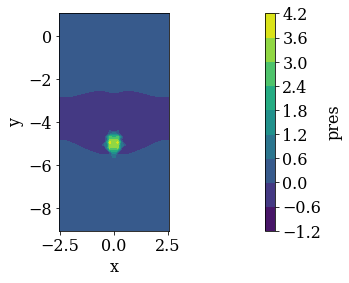

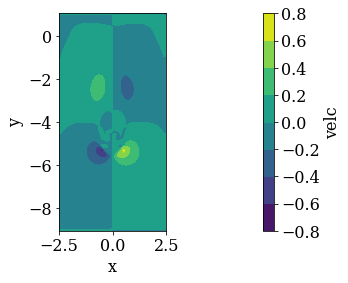

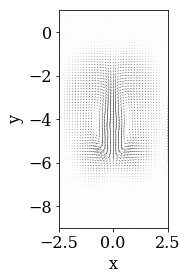

Level Set Mapping Time:  0.27498388290405273
------------ Time = 5.009999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.2006786469684287e-13
Total poisson time : 0.0007128715515136719
Total INS time : 0.0016901493072509766
Max, Min, U   : 0.6608606666003862, -0.660860666600386
Max, Min, V   : 0.40082718797464867, -1.3427898467385126
Max, Min, P   : 3.595882896021124, -1.4794752054219191
Max, Min, DIV : 1.609823385706477e-15, -1.3322676295501878e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.27538585662841797
------------ Time = 5.019999999999937 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.469590743055306e-13
Total poisson time : 0.0007200241088867188
Total INS time : 0.001687765121459961
Max, Min, U   : 0.7233443044751877, -0.7233443044751874
Max, Min, V   : 0.40093146269848773, -1.3428028493759872
Max, Min, P   : 3.424383623742653, -1.1476983870453226
Max, Min, DIV : 1.5404344466674047e-15, -

Level Set Mapping Time:  0.2901151180267334
------------ Time = 5.169999999999934 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.236868283908467e-13
Total poisson time : 0.0007588863372802734
Total INS time : 0.0017690658569335938
Max, Min, U   : 0.6614770810951709, -0.6614770810951709
Max, Min, V   : 0.40227493384433044, -1.3390563716023827
Max, Min, P   : 3.474694484914284, -2.645486529697675
Max, Min, DIV : 1.817990202823694e-15, -1.4988010832439613e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.28357720375061035
------------ Time = 5.179999999999934 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1428558129575177e-13
Total poisson time : 0.0007638931274414062
Total INS time : 0.001764059066772461
Max, Min, U   : 0.7198119270749296, -0.7198119270749297
Max, Min, V   : 0.40109732635321066, -1.3390824438754947
Max, Min, P   : 3.4775655234578973, -2.883352580213905
Max, Min, DIV : 1.7763568394002505e-15, -1

Level Set Mapping Time:  0.27624988555908203
------------ Time = 5.329999999999931 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3694589561358482e-13
Total poisson time : 0.0007610321044921875
Total INS time : 0.0017421245574951172
Max, Min, U   : 0.7249878488474694, -0.7249878488474695
Max, Min, V   : 0.39832738276678087, -1.3343745299332115
Max, Min, P   : 3.441970567032112, -1.6536832014553975
Max, Min, DIV : 1.609823385706477e-15, -1.3600232051658168e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2757251262664795
------------ Time = 5.339999999999931 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3102935130289504e-13
Total poisson time : 0.0007581710815429688
Total INS time : 0.0017361640930175781
Max, Min, U   : 0.6891853223209851, -0.6891853223209852
Max, Min, V   : 0.39848451142768404, -1.3342337519702812
Max, Min, P   : 3.5314677471716234, -0.8284503847977069
Max, Min, DIV : 1.4988010832439613e-15

Level Set Mapping Time:  0.41155195236206055
------------ Time = 5.489999999999927 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0589681674752388e-13
Total poisson time : 0.00080108642578125
Total INS time : 0.001956939697265625
Max, Min, U   : 0.6555979673365224, -0.6555979673365222
Max, Min, V   : 0.39877887766936493, -1.3292172560031028
Max, Min, P   : 3.9337091123638097, -0.6746884956145129
Max, Min, DIV : 1.7208456881689926e-15, -1.2212453270876722e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.36185598373413086
------------ Time = 5.499999999999927 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.55488313220111e-14
Total poisson time : 0.0008590221405029297
Total INS time : 0.001905202865600586
Max, Min, U   : 0.6394283797196009, -0.6394283797196008
Max, Min, V   : 0.39855939058334117, -1.328777413519296
Max, Min, P   : 3.8118122652177915, -0.5806104973488267
Max, Min, DIV : 1.5890067039947553e-15, -1

Level Set Mapping Time:  0.28080320358276367
------------ Time = 5.649999999999924 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2298872718381857e-13
Total poisson time : 0.0007581710815429688
Total INS time : 0.001711130142211914
Max, Min, U   : 0.7269755126900159, -0.726975512690016
Max, Min, V   : 0.39907319494811333, -1.324648073162537
Max, Min, P   : 3.753849344091117, -0.8834146165703674
Max, Min, DIV : 1.7763568394002505e-15, -1.3357370765021415e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.28558897972106934
------------ Time = 5.659999999999924 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0724116333757515e-13
Total poisson time : 0.0007898807525634766
Total INS time : 0.0017850399017333984
Max, Min, U   : 0.6740452003188738, -0.674045200318874
Max, Min, V   : 0.4001996594272956, -1.3248904110319155
Max, Min, P   : 3.6020390973714864, -1.8680356670970766
Max, Min, DIV : 1.4988010832439613e-15, -

Level Set Mapping Time:  0.2740180492401123
------------ Time = 5.809999999999921 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.686550060708284e-14
Total poisson time : 0.0007512569427490234
Total INS time : 0.0017130374908447266
Max, Min, U   : 0.7072470764811631, -0.7072470764811633
Max, Min, V   : 0.39717827173435916, -1.320451051668709
Max, Min, P   : 3.344282459952545, -2.5273572852666732
Max, Min, DIV : 1.3877787807814457e-15, -1.6653345369377348e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.27213430404663086
------------ Time = 5.81999999999992 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6029573204266644e-13
Total poisson time : 0.000743865966796875
Total INS time : 0.0017518997192382812
Max, Min, U   : 0.7341140907323984, -0.7341140907323984
Max, Min, V   : 0.39711848935906097, -1.3202529528897977
Max, Min, P   : 3.398562737502054, -2.2248271235250936
Max, Min, DIV : 1.4988010832439613e-15, -1

Level Set Mapping Time:  0.3091719150543213
------------ Time = 5.969999999999917 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5496087166162555e-13
Total poisson time : 0.0010023117065429688
Total INS time : 0.0020759105682373047
Max, Min, U   : 0.684006312299912, -0.6840063122999124
Max, Min, V   : 0.3970476743757905, -1.3157745851376788
Max, Min, P   : 4.041637046503063, -0.6106748779763341
Max, Min, DIV : 1.609823385706477e-15, -1.5543122344752192e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.28711485862731934
------------ Time = 5.979999999999917 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.982842147889046e-14
Total poisson time : 0.0007531642913818359
Total INS time : 0.0017352104187011719
Max, Min, U   : 0.6716924019000087, -0.671692401900009
Max, Min, V   : 0.39746682788507626, -1.3155587351161238
Max, Min, P   : 4.100534538646131, -0.6113879049612597
Max, Min, DIV : 1.4432899320127035e-15, -1.

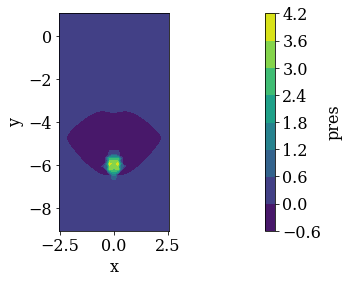

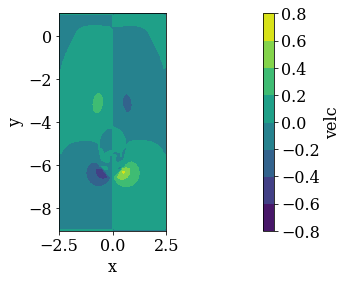

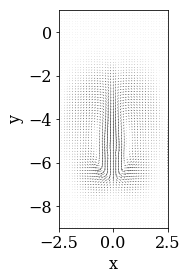

Level Set Mapping Time:  0.2792508602142334
------------ Time = 6.009999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.692667467125861e-13
Total poisson time : 0.0007581710815429688
Total INS time : 0.0017447471618652344
Max, Min, U   : 0.6602844797484156, -0.6602844797484156
Max, Min, V   : 0.3970060646942753, -1.3139542223512415
Max, Min, P   : 3.6603227223620984, -1.4044511002381133
Max, Min, DIV : 2.6645352591003757e-15, -1.7763568394002505e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.28157591819763184
------------ Time = 6.019999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3645353377317265e-13
Total poisson time : 0.0007343292236328125
Total INS time : 0.0016901493072509766
Max, Min, U   : 0.7225813577482979, -0.7225813577482979
Max, Min, V   : 0.39709249936013097, -1.313559328331052
Max, Min, P   : 3.513050283478451, -1.048795492959126
Max, Min, DIV : 1.5959455978986625e-15, -

Level Set Mapping Time:  0.2894110679626465
------------ Time = 6.169999999999913 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1331632793205836e-13
Total poisson time : 0.0007166862487792969
Total INS time : 0.0016677379608154297
Max, Min, U   : 0.6617225705572515, -0.6617225705572518
Max, Min, V   : 0.3986863773732207, -1.309717214815143
Max, Min, P   : 3.5847856261298605, -2.521519619194655
Max, Min, DIV : 1.6653345369377348e-15, -1.5265566588595902e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.27570414543151855
------------ Time = 6.179999999999913 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.138359404440098e-13
Total poisson time : 0.0007631778717041016
Total INS time : 0.0017237663269042969
Max, Min, U   : 0.718572325040907, -0.718572325040907
Max, Min, V   : 0.3974960039806204, -1.3092860640046364
Max, Min, P   : 3.5649568873373014, -2.780225809623394
Max, Min, DIV : 1.582067810090848e-15, -1.58

Level Set Mapping Time:  0.3088037967681885
------------ Time = 6.3299999999999095 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2346961114351998e-13
Total poisson time : 0.0007498264312744141
Total INS time : 0.0017528533935546875
Max, Min, U   : 0.7238067820363082, -0.7238067820363082
Max, Min, V   : 0.3961253436856789, -1.3047594994919733
Max, Min, P   : 3.585134012722715, -1.4989912649318429
Max, Min, DIV : 1.6653345369377348e-15, -1.3322676295501878e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.29921889305114746
------------ Time = 6.339999999999909 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.140503983695429e-14
Total poisson time : 0.0007119178771972656
Total INS time : 0.0016591548919677734
Max, Min, U   : 0.6879877309885287, -0.6879877309885287
Max, Min, V   : 0.39626833104599324, -1.3041850217962394
Max, Min, P   : 3.6790392340217855, -0.6717491312527827
Max, Min, DIV : 1.609823385706477e-15,

Level Set Mapping Time:  0.3480801582336426
------------ Time = 6.489999999999906 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.309277235765132e-14
Total poisson time : 0.0009520053863525391
Total INS time : 0.002032756805419922
Max, Min, U   : 0.6565312739203712, -0.6565312739203712
Max, Min, V   : 0.396188155819296, -1.299350021541566
Max, Min, P   : 4.014270206034906, -0.5925667385079845
Max, Min, DIV : 1.4432899320127035e-15, -1.4988010832439613e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.31266307830810547
------------ Time = 6.499999999999906 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.404246509868027e-14
Total poisson time : 0.0007188320159912109
Total INS time : 0.0017402172088623047
Max, Min, U   : 0.6403494076090425, -0.6403494076090425
Max, Min, V   : 0.3960542951818845, -1.298776952058581
Max, Min, P   : 3.8883123080887603, -0.5029322878005349
Max, Min, DIV : 9.992007221626409e-16, -1.498

Level Set Mapping Time:  0.27437901496887207
------------ Time = 6.649999999999903 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3318930216481079e-13
Total poisson time : 0.0008528232574462891
Total INS time : 0.0018191337585449219
Max, Min, U   : 0.7293890903540053, -0.7293890903540052
Max, Min, V   : 0.39701401030083366, -1.2945934169065043
Max, Min, P   : 3.887765746070342, -0.7571648637269879
Max, Min, DIV : 1.5265566588595902e-15, -1.1223660889569942e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2748551368713379
------------ Time = 6.659999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3601798523089663e-13
Total poisson time : 0.0012249946594238281
Total INS time : 0.0023632049560546875
Max, Min, U   : 0.6763866998778897, -0.6763866998778898
Max, Min, V   : 0.39813497740980325, -1.294871637972437
Max, Min, P   : 3.7335570461557985, -1.7436007785439434
Max, Min, DIV : 1.582067810090848e-15,

Level Set Mapping Time:  0.26922082901000977
------------ Time = 6.809999999999899 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1790841424101566e-13
Total poisson time : 0.0007510185241699219
Total INS time : 0.0017299652099609375
Max, Min, U   : 0.7092692408036312, -0.7092692408036313
Max, Min, V   : 0.3957141945482386, -1.2908297374563853
Max, Min, P   : 3.4190366578068345, -2.472043541460024
Max, Min, DIV : 1.6792123247455493e-15, -1.7763568394002505e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.27695798873901367
------------ Time = 6.819999999999899 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3213753730955645e-13
Total poisson time : 0.0006971359252929688
Total INS time : 0.0016560554504394531
Max, Min, U   : 0.7361245688993586, -0.7361245688993587
Max, Min, V   : 0.39564512589991435, -1.2907164141554792
Max, Min, P   : 3.469215775865082, -2.173323789868801
Max, Min, DIV : 1.6653345369377348e-15,

Level Set Mapping Time:  0.2767972946166992
------------ Time = 6.969999999999896 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.615725909647437e-14
Total poisson time : 0.0006999969482421875
Total INS time : 0.0016679763793945312
Max, Min, U   : 0.689795987199562, -0.6897959871995618
Max, Min, V   : 0.3958532981986308, -1.2861588676560112
Max, Min, P   : 4.123697393147243, -0.5534174454791135
Max, Min, DIV : 1.4432899320127035e-15, -1.27675647831893e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.414074182510376
------------ Time = 6.979999999999896 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.405492321364953e-14
Total poisson time : 0.0006947517395019531
Total INS time : 0.0016560554504394531
Max, Min, U   : 0.6774282984088615, -0.6774282984088613
Max, Min, V   : 0.396422723169966, -1.2860085768368834
Max, Min, P   : 4.1715972736194535, -0.5659604310989895
Max, Min, DIV : 1.6653345369377348e-15, -1.6653

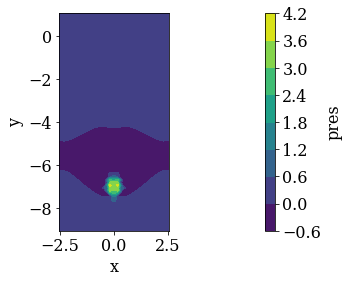

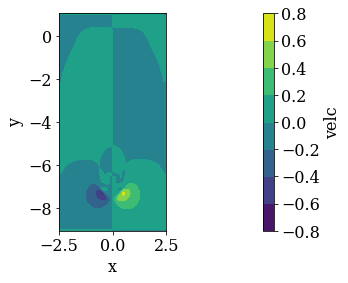

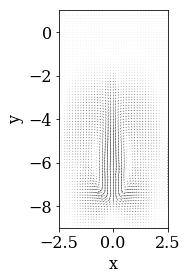

Level Set Mapping Time:  0.2805161476135254
------------ Time = 7.009999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0729439158102576e-13
Total poisson time : 0.0007140636444091797
Total INS time : 0.0016751289367675781
Max, Min, U   : 0.6676843319868955, -0.6676843319868953
Max, Min, V   : 0.39691050121454025, -1.2848036209143237
Max, Min, P   : 3.7348984543174524, -1.36231674490378
Max, Min, DIV : 1.6653345369377348e-15, -1.6653345369377348e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.28215694427490234
------------ Time = 7.019999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0998482504769657e-13
Total poisson time : 0.0007028579711914062
Total INS time : 0.0016520023345947266
Max, Min, U   : 0.7308412507868126, -0.7308412507868124
Max, Min, V   : 0.39702233865233605, -1.2845226747094227
Max, Min, P   : 3.5834243709720286, -1.0061663476980456
Max, Min, DIV : 1.3530843112619095e-15

Level Set Mapping Time:  0.3057417869567871
------------ Time = 7.169999999999892 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1645397149365365e-13
Total poisson time : 0.0007388591766357422
Total INS time : 0.0016968250274658203
Max, Min, U   : 0.6732770100159988, -0.6732770100159988
Max, Min, V   : 0.3997718550256437, -1.280850419666385
Max, Min, P   : 3.661650677864308, -2.512578917531696
Max, Min, DIV : 1.7763568394002505e-15, -1.3322676295501878e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.3050050735473633
------------ Time = 7.179999999999891 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0951356293184006e-13
Total poisson time : 0.0007760524749755859
Total INS time : 0.001753091812133789
Max, Min, U   : 0.7266968958478738, -0.7266968958478738
Max, Min, V   : 0.39861265319192485, -1.2805183355736545
Max, Min, P   : 3.6411264927421, -2.7745403136877917
Max, Min, DIV : 1.4988010832439613e-15, -1.54

Level Set Mapping Time:  0.31171321868896484
------------ Time = 7.329999999999888 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3184701264236004e-13
Total poisson time : 0.0007169246673583984
Total INS time : 0.001737833023071289
Max, Min, U   : 0.7360227058357081, -0.7360227058357081
Max, Min, V   : 0.4053025374963795, -1.275865738441732
Max, Min, P   : 3.5640777715122294, -1.595885677288205
Max, Min, DIV : 1.609823385706477e-15, -1.4988010832439613e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2815678119659424
------------ Time = 7.339999999999888 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.718313032042816e-14
Total poisson time : 0.0006940364837646484
Total INS time : 0.0016477108001708984
Max, Min, U   : 0.704759028995358, -0.7047590289953581
Max, Min, V   : 0.40533483583908386, -1.275403148578841
Max, Min, P   : 3.647834675838374, -0.7746674423375367
Max, Min, DIV : 1.5265566588595902e-15, -1.77

Level Set Mapping Time:  0.2747800350189209
------------ Time = 7.489999999999885 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.72693749954438e-14
Total poisson time : 0.0007412433624267578
Total INS time : 0.0016770362854003906
Max, Min, U   : 0.6799128661542205, -0.6799128661542206
Max, Min, V   : 0.4019918284900586, -1.2708992867362463
Max, Min, P   : 4.062849158937137, -0.6657337626365819
Max, Min, DIV : 1.5543122344752192e-15, -1.6653345369377348e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.27153491973876953
------------ Time = 7.4999999999998845 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.770092640482572e-14
Total poisson time : 0.0006940364837646484
Total INS time : 0.0016460418701171875
Max, Min, U   : 0.6634011275099357, -0.6634011275099359
Max, Min, V   : 0.40264741602504656, -1.2702711056949552
Max, Min, P   : 3.9442001878392463, -0.5642676931210742
Max, Min, DIV : 1.633675833501158e-15, -

Level Set Mapping Time:  0.3291950225830078
------------ Time = 7.649999999999881 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0218809202422924e-13
Total poisson time : 0.0009968280792236328
Total INS time : 0.002975940704345703
Max, Min, U   : 0.7802302607863375, -0.7802302607863374
Max, Min, V   : 0.40739974793292794, -1.2661372374466124
Max, Min, P   : 4.062460299052204, -0.8175182143319535
Max, Min, DIV : 1.5543122344752192e-15, -1.547373340571312e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.2946300506591797
------------ Time = 7.659999999999881 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.905717871805668e-13
Total poisson time : 0.0007517337799072266
Total INS time : 0.0017039775848388672
Max, Min, U   : 0.7253405375977966, -0.7253405375977965
Max, Min, V   : 0.40940154400485285, -1.2663283082265495
Max, Min, P   : 3.9553213320749765, -1.7924754525419646
Max, Min, DIV : 1.4849232954361469e-15, -

Level Set Mapping Time:  0.4388148784637451
------------ Time = 7.809999999999878 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.607926302505841e-14
Total poisson time : 0.000997304916381836
Total INS time : 0.002274751663208008
Max, Min, U   : 0.7587040745676892, -0.7587040745676887
Max, Min, V   : 0.42118592607455757, -1.2623115912350646
Max, Min, P   : 3.7634487818268534, -2.633234380653808
Max, Min, DIV : 1.7763568394002505e-15, -1.625002216121274e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.443727970123291
------------ Time = 7.819999999999878 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.098021842243138e-13
Total poisson time : 0.0009591579437255859
Total INS time : 0.0022821426391601562
Max, Min, U   : 0.7881197340780239, -0.7881197340780236
Max, Min, V   : 0.43519594819565954, -1.2621691093972813
Max, Min, P   : 3.783065981776181, -2.3565828659316304
Max, Min, DIV : 1.7052331768852014e-15, -1.44

Level Set Mapping Time:  0.42814207077026367
------------ Time = 7.9699999999998745 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.342120125061426e-14
Total poisson time : 0.0009860992431640625
Total INS time : 0.0025081634521484375
Max, Min, U   : 0.7957529017346463, -0.7957529017346463
Max, Min, V   : 0.4652393843034607, -1.2581992074124604
Max, Min, P   : 4.565070505339693, -0.6238391577805132
Max, Min, DIV : 1.4710455076283324e-15, -1.4155343563970746e-15
Qin, Qout     : 0.0, 0.0


Level Set Mapping Time:  0.41559600830078125
------------ Time = 7.979999999999874 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.8880267582383e-14
Total poisson time : 0.0008361339569091797
Total INS time : 0.001966238021850586
Max, Min, U   : 0.7824732525693282, -0.7824732525693282
Max, Min, V   : 0.4550400933261368, -1.2580122323147844
Max, Min, P   : 4.6393027254126284, -0.6293628016124122
Max, Min, DIV : 1.6514567491299204e-15, -1

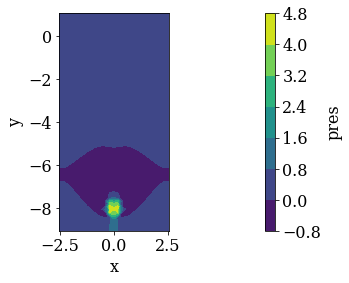

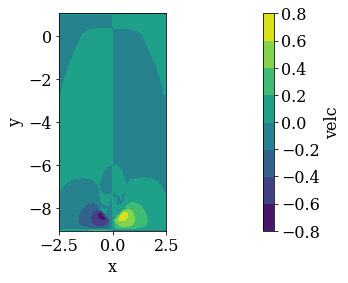

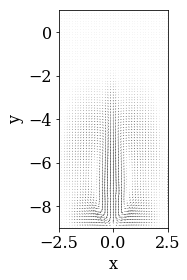

Level Set Mapping Time:  0.423051118850708
------------ Time = 8.009999999999874 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.64812277114693e-13
Total poisson time : 0.0014369487762451172
Total INS time : 0.003434896469116211
Max, Min, U   : 0.8113624857399675, -0.8113624857399675
Max, Min, V   : 0.43864236736709405, -1.2568253404703476
Max, Min, P   : 4.344146788041926, -1.458173771360868
Max, Min, DIV : 1.5543122344752192e-15, -1.4988010832439613e-15
Qin, Qout     : 0.0, 0.0




In [3]:
while scalars.time <= scalars.tmax:
    
    imbound.map_to_grid()

    ins.advance()

    for particle in particles:
        particle.advance()

    scalars.advance()
    
    # Display stats
    if scalars.nstep % 1 == 0:
        print("Level Set Mapping Time: ",imbound._mapping_time)
        flowx.io.display_stats(scalars) 
        
    if scalars.nstep % 100 == 0:
        flowx.io.plot_contour(gridc, 'pres')
        flowx.io.plot_contour(gridx, 'velc')
        flowx.io.plot_vector(gridx,gridy,'velc')
              

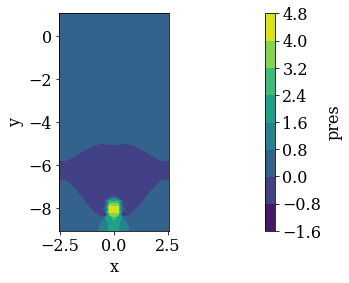

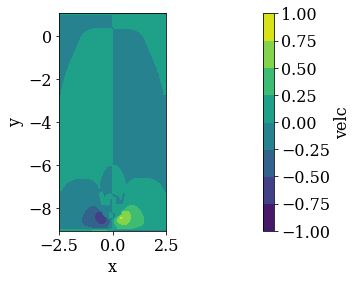

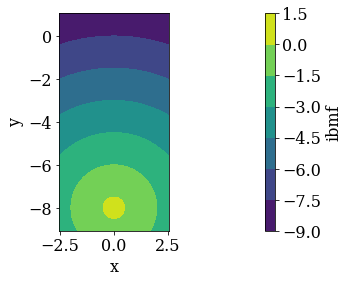

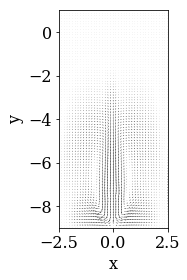

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridc, 'ibmf')
flowx.io.plot_vector(gridx,gridy,'velc')